# AlexNet(Tensorflow)

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops

## Load data set

现在我们已经知道如何加载CatsVsDogs,现在我们基于LoadCatsVsDogs来写Load_data,与LoadCatsVsDogs不同的是我们这里多定义了一个```Get_next_(self)```用于使用迭代器```self.next_element```产生新的数据.

In [2]:
class Load_data:
    """
    Load data set.
    """
    def __init__(self,file_dir,n_h,n_w,BATCH_SIZE,sess):
        """
        Argus:
        -----
            file_dir: catsVSdogs' dir path.
            n_h: target out height, resize parameter.
            n_w: target out width, resize parameter.
            BATCH_SIZE: batch size.
            sess: Tensorflow session.
        """
        self.file_dir = file_dir
        self.n_h = n_h
        self.n_w = n_w
        self.BATCH_SIZE = BATCH_SIZE
        self.total_sample = 0
        self.cat_sample = 0
        self.dog_sample = 0
        self.sess = sess
        features,labels = self.get_files()
        self.next_element = self.get_batch(features,labels)
        
    def get_files(self):
        """
        Get files fo given file_dir parameter.

        Returns:
        -------
            data_path: Include picture file path  and it's a  ndarray,the shape is  (m_sample,1).
            labels: incloud labels,cat:0,dog:1.the shape is (m_sample,)
        Note:
        ----
            Given file_dir parameter have not "/" in the end.like "../../train"
        """
        data_path = []
        labels = []

        files = os.listdir(file_dir)
        self.total_sample = len(files)
        for file in files:
            classes_name,_ = file.split('.',1)
            if classes_name == 'cat':
                labels.append(0)
                self.cat_sample += 1
            else:
                labels.append(1)
                self.dog_sample += 1
            data_path.append(['/'.join((file_dir,file))])

        data_path = np.array(data_path)
        labels = np.array(labels)

        return data_path,labels
    
    def _parse_function(self,filename,labels,n_h=224,n_w=224):
        """
        parse fuction.

        Argus:
        ------
            filename: data_path,the shape is (batch,1), incloud picture file path.
            labels: picture labels, not do anything !Make sure the labels one by one training he picture in the shuffle data.
            n_h: resize's height.
            n_w: resize' width.

        Returns:
        -------
            image_resize: result of image riszed ,the shape is (batch,n_h,n_w,n_c).
            labels: labels.
        """
        image_string = tf.read_file(filename[0])
        image_decoded = tf.image.decode_jpeg(image_string)
        # resize,using ResizeMethod.BILINEAR.
        image_resize = tf.image.resize_images(image_decoded,(n_h,n_w))
        return image_resize,labels
    
    
    def get_batch(self,features,labels):
        """
        Using tf.data.Dataset to read file.
        More Information:https://www.tensorflow.org/guide/datasets

        Argus:
        -----
            features: ndarray,incloud picture path ,shape:(m,1).
            labels: ndarray,incloud picture labes.cat:0,dog:1.
            n_h: resize's heights.
            n_w: resize's widths.
            BATCH_SIZE: mini batch size.
        """
        features_placeholder = tf.placeholder(features.dtype,features.shape)
        labels_placeholder = tf.placeholder(labels.dtype,labels.shape)
        n_h_placeholder = tf.placeholder(tf.int32,labels.shape)
        n_w_placeholder = tf.placeholder(tf.int32,labels.shape)


        # every parameter's shape must be same!.
        dataset = tf.data.Dataset.from_tensor_slices((features_placeholder,labels_placeholder,n_h_placeholder,n_w_placeholder))
        dataset = dataset.map(self._parse_function) 
        dataset = dataset.shuffle(1000) 
        dataset = dataset.batch(self.BATCH_SIZE)
        dataset = dataset.repeat() 

        iterator = dataset.make_initializable_iterator()
        next_element = iterator.get_next()
        
        n_h = np.array([self.n_h for i in range(features.shape[0])])
        n_w = np.array([self.n_w for i in range(features.shape[0])])
        self.sess.run(iterator.initializer,feed_dict={features_placeholder:features,labels_placeholder:labels,
            n_h_placeholder:n_h,n_w_placeholder:n_w})
        
        return next_element
            
    def Get_next_(self):
        """
        Get Net data in currect session.
        """
        try:
            img,label = self.sess.run(self.next_element)
            return img,label
        
        except tf.errors.OutOfRangeError:
            
            print('The Queue is empy !')

先来我们来调用一下该函数.

Instructions for updating:
Colocations handled automatically by placer.
The Total Sampel is: 25000,Cats Sample is: 12500, Dogs Sample is: 12500
The Image shape is: (10, 224, 224, 3), in the Batch size:10
The Labels shape is: (10,) in the Batch size:10


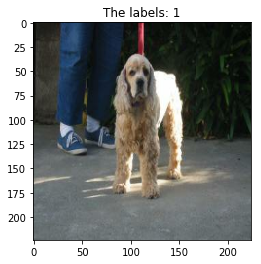

In [3]:
tf.reset_default_graph()
file_dir = '/Users/huwang/Joker/Data_Set/catVSdot/train'
BATCH_SIZE = 10
sess = tf.Session()
load_ = Load_data(file_dir=file_dir,n_h=224,n_w=224,BATCH_SIZE=BATCH_SIZE,sess=sess)
img_data,labels = load_.Get_next_()
print('The Total Sampel is: {},Cats Sample is: {}, Dogs Sample is: {}'.format(load_.total_sample,
                                                                              load_.cat_sample,
                                                                             load_.dog_sample))
print('The Image shape is: {}, in the Batch size:{}'.format(img_data.shape,BATCH_SIZE))
print('The Labels shape is: {} in the Batch size:{}'.format(labels.shape,BATCH_SIZE))

plt.imshow(img_data[0] / 255)
plt.title('The labels: {}'.format(labels[0]))
plt.show()

我们使用```load_.Get_next_()```来调用下第二张图片.

The Image shape is: (10, 224, 224, 3), in the Batch size:10
The Labels shape is: (10,) in the Batch size:10


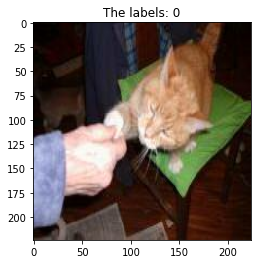

In [4]:
img_data,labels = load_.Get_next_()
print('The Image shape is: {}, in the Batch size:{}'.format(img_data.shape,BATCH_SIZE))
print('The Labels shape is: {} in the Batch size:{}'.format(labels.shape,BATCH_SIZE))

plt.imshow(img_data[0] / 255)
plt.title('The labels: {}'.format(labels[0]))
plt.show()

我们使用```load_.Get_next_()```来调用一下第三张图片.

The Image shape is: (10, 224, 224, 3), in the Batch size:10
The Labels shape is: (10,) in the Batch size:10


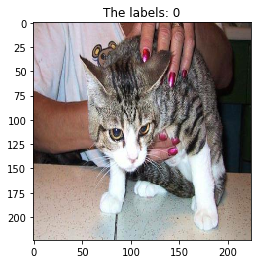

In [5]:
img_data,labels = load_.Get_next_()
print('The Image shape is: {}, in the Batch size:{}'.format(img_data.shape,BATCH_SIZE))
print('The Labels shape is: {} in the Batch size:{}'.format(labels.shape,BATCH_SIZE))

plt.imshow(img_data[0] / 255)
plt.title('The labels: {}'.format(labels[0]))
plt.show()

可以看到我们使用```load_.Get_next_()```即可在当前session下获取下一张图片,那么我们就可以在epoch中去调用该函数达到加载数据的效果.

## Build Model

下面我们来构建AlexNet模型,整体的框架如下显示:

![](../../../../../picture/182.png)


### [1] Initialization Parameters

首先我们依照AlexNet框架初始化$C1-C5$的参数.

In [6]:
def init_parameters():
    """
    Initialization parameters.
    
    Returns:
    --------
        parameters: Included weights and bias,weights shape is (f_h,f_w,f_c,f_m),f_c=n_c.
                    bias shape is (1,1,n_c).
    """
    init_w = tf.keras.initializers.glorot_normal(seed=1)
    init_b = tf.keras.initializers.zeros()
    W1 = tf.get_variable('W1',[11,11,3,96],initializer=init_w)
    b1 = tf.get_variable('b1',[1,1,96],initializer=init_w)
    W2 = tf.get_variable('W2',[5,5,96,256],initializer=init_w)
    b2 = tf.get_variable('b2',[1,1,256],initializer=init_b)
    W3 = tf.get_variable('W3',[3,3,256,384],initializer=init_w)
    b3 = tf.get_variable('b3',[1,1,384],initializer=init_b)
    W4 = tf.get_variable('W4',[3,3,384,384],initializer=init_w)
    b4 = tf.get_variable('b4',[1,1,384],initializer=init_b)
    W5 = tf.get_variable('W5',[3,3,384,256],initializer=init_w)
    b5 = tf.get_variable('b5',[1,1,256],initializer=init_b)
    
    parameters = W1,b1,W2,b2,W3,b3,W4,b4,W5,b5
    
    return parameters

### [2] Forward

现在我们来构建Forward Propagation.这里我们做一点小小的改变,由于原始的AlexNe最后的输出是1000个神经元,也就是1000个分类中的一个,但是我们现在的数据集是2分类,所以我在这里多加了一层全连接层$F8=1000$,否则直接由4096神经元节点输出为1个神经元节点可能过渡范围过大.

In [7]:
def forward(data,parameters,rate):
    """
    Forward Propagation.
    
    Arguments:
    ---------
        data: train data set,the shape is (batch,n_h,n_w,n_c).
        parameters: include weights and bias.
        rate: Dropout rate, rate = 1- keep_prob.
        
    Returns:
    --------
        out: Fully-connect 8 value, out layer value.
    """
    
    W1,b1,W2,b2,W3,b3,W4,b4,W5,b5 = parameters
    
    ########################### CONV1 #######################################################
    C1 = tf.nn.conv2d(data,W1,strides=[1,4,4,1],padding="VALID",name='CONV1')+b1
    R1 = tf.nn.relu(C1)
    P1 = tf.nn.max_pool(R1,ksize=[1,3,3,1],strides=[1,2,2,1],padding="VALID",name='POOL1')
    # local region normal. n = depth_radius = 5
    LRN1 = tf.nn.lrn(P1, depth_radius=5, bias=2, alpha=1e-4, beta=0.75,name='LRN1')
    ########################## end of CONV1 ##################################################
    
    ########################## CONV2 #########################################################
    C2 = tf.nn.conv2d(LRN1,W2,strides=[1,1,1,1],padding='SAME',name="CONV2")+b2
    R2 = tf.nn.relu(C2)
    P2 = tf.nn.max_pool(R2,ksize=[1,3,3,1],strides=[1,2,2,1],padding="VALID",name='POOL2')
    LRN2 = tf.nn.lrn(P2, depth_radius=5, bias=2, alpha=1e-4, beta=0.75,name="LRN2")
    ########################## end of CONV2 ##################################################
    
    ########################## CONV3 #########################################################
    C3 = tf.nn.conv2d(LRN2,W3,strides=[1,1,1,1],padding="SAME",name="CONV3") + b3
    R3 = tf.nn.relu(C3)
    ########################## end of CONV3 ##################################################
    
    ########################## CONV4 #########################################################
    C4 = tf.nn.conv2d(R3,W4,strides=[1,1,1,1],padding="SAME",name="CONV4") + b4
    R4 = tf.nn.relu(C4)
    ########################## end of CONV4 ##################################################
    
    ########################## CONV5 #########################################################
    C5 = tf.nn.conv2d(R4,W5,strides=[1,1,1,1],padding="SAME",name="CONV5") + b5
    R5 = tf.nn.relu(C5)
    P5 = tf.nn.max_pool(R5,ksize=[1,3,3,1],strides=[1,2,2,1],padding="VALID",name="POOL5")
    ########################## end of CONV5 ##################################################
    
    ########################## Flatten #######################################################
    Flatten = tf.layers.flatten(P5,name='Flatten')
    
    ########################## FC6 ###########################################################
    F6 = tf.contrib.layers.fully_connected(Flatten,num_outputs=4096)
    R6 = tf.nn.relu(F6)
    D6 = tf.nn.dropout(R6,rate=rate,name='DROP6')
    ########################## end of FC6 ####################################################
    
    ########################## FC7 ###########################################################
    F7 = tf.contrib.layers.fully_connected(D6,num_outputs=4096)
    R7 = tf.nn.relu(F7)
    D7 = tf.nn.dropout(R7,rate=rate,name='DROP7')
    ########################## end of FC7 ####################################################
    
    ########################## add FC8 #######################################################
    F8 = tf.contrib.layers.fully_connected(D7,num_outputs=1000)
    R8 = tf.nn.relu(F8)
    D8 = tf.nn.dropout(R8,rate=rate,name='DROP8')
    ########################## end of FC8 ####################################################
    
    # Must set activation_fn=None.
    out = tf.contrib.layers.fully_connected(D8,num_outputs=1,activation_fn=None)
    
    return out

接下来我们来测试一下Forward,为了简单处理,我们这里只采取一个batch size 即 Batch size = 10.

In [8]:
X = tf.placeholder(tf.float32,[None,227,227,3])
rate = tf.placeholder(tf.float32)
parameters  = init_parameters()
out = forward(X,parameters=parameters,rate=rate)
init = tf.global_variables_initializer()

sess.run(init)
data,_ = load_.Get_next_()
data = np.pad(data,pad_width=((0,0),(1,2),(1,2),(0,0)),mode="constant")
Out = sess.run(out,feed_dict={X:data,rate:0.7})
print("The output shape is: {}".format(Out.shape))

sess.close()

Instructions for updating:
Use keras.layers.flatten instead.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

The output shape is: (10, 1)


可以看到输出的结果是正确的shape形式即:(batch,classes)

## [3] Model

现在我们来创建Model,我们可以使用```saver = tf.train.Saver()```来保存模型,由于我们要保存```out```作为预测时候的运行函数,所以我们需要使用```tf.add_to_collection('pre_network',out)```来增加collection.

更多关于模型保存与加载请看[Save and Restore](https://www.tensorflow.org/guide/saved_model)

In [9]:
def Model(epochs,lr,RATE,BATCH_SIZE,file_dir,resize_shape):
    """
    Implemention AlexNet Model.
    
    Argus:
    -----
        epochs: Number of Iterate.
        lr: learning rate in RMSProp optimizer.
        RATE: Dropout rate,its queal 1-keep_prob.
        BATCH_SIZE: batch size
        file_dir: CatsVSDogs main dir path. like "../train"
        resize_shape: image rize shape,default (n_h=224,n_w=224),its a tuple.
    """
    ops.reset_default_graph()
    
    n_h,n_w = resize_shape
    X = tf.placeholder(tf.float32,[None,227,227,3],name='Input')
    y = tf.placeholder(tf.float32,[None,1],name="Labels")
    rate = tf.placeholder(tf.float32,name='rate')
    
    # Forward
    parameters  = init_parameters()
    stand_X = tf.image.per_image_standardization(X)
    out = forward(stand_X,parameters=parameters,rate=rate)
    # using sigmoid cross entopy
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=out,labels=y))
    # using RMSProp optimizer.
    optimizer = tf.train.RMSPropOptimizer(learning_rate=lr).minimize(cost)
    
    # Predict 
    sigmoid_out = tf.nn.sigmoid(out)
    predict = tf.round(sigmoid_out)
    correct = tf.equal(predict,y)
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
    
    # saver model.
    saver = tf.train.Saver()
    tf.add_to_collection('pre_network',out)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        load_ = Load_data(file_dir=file_dir,n_h=n_h,n_w=n_w,BATCH_SIZE=BATCH_SIZE,sess=sess)
        total_sample = load_.total_sample
        N = total_sample// BATCH_SIZE
        for epoch in range(epochs):
            
            for i in range(N):
                print('Batch Size:{} [{}/{}/{}-{}]\r'.format(BATCH_SIZE,epochs,epoch,N,i),end="",flush=True)
                mini_x,mini_y = load_.Get_next_()
                mini_x = np.pad(mini_x,pad_width=((0,0),(1,2),(1,2),(0,0)),mode='constant')
                
                mini_y = mini_y.reshape(-1,1)
                sess.run([optimizer],feed_dict={X:mini_x,y:mini_y,rate:RATE})
                
                # ramdom chosse sample to score. shape (batch,...)
                data,labels = load_.Get_next_()
                data = np.pad(data,pad_width=((0,0),(1,2),(1,2),(0,0)),mode='constant')
                labels = labels.reshape(-1,1)
                acc_train,loss_train = sess.run([accuracy,cost],feed_dict={X:data,y:labels,rate:0})
                
            print('[{}/{}] loss train:{:.4f} acc train:{:.4f}'.format(epoch+1,epochs,loss_train,acc_train))
            
        saver.save(sess,'Model_save')

In [ ]:
file_dir = 'train'
Model(epochs=13,lr=1e-4,RATE=0.3,BATCH_SIZE=100,file_dir=file_dir,resize_shape=(224,224))

由于模型训练样本过大,我们将其push到Google cloud进行训练,为了模型训练方便,我们写一个简单的shell脚本Model.sh

```sh
#!/bin/bash
python3 AlexNet\(Tensorflow\).py >> AlexNet_rest.txt

echo "password" | sudo shutdown -h now

```

首先运行```AlexNet(Tensorflow).py```文件,结束之后关闭VM实例.

那么运行shell脚本之后的结果为:

<img src="../../../../../picture/206.png" height=300 width=300>

更多详情请查看AlexNet_rest.txt

训练完毕之后会产生一个Model_save的文件夹,其目录为:

<img src="../../../../../picture/207.png" height=300 width=300>

### [4] Predict

现在我们已经有了训练完毕的Model文件,现在我们需要将其加载进来进行预测.

在AlexNet中,测试阶段输入一张$(256,256)$的图片,取其4个角(left_up,right_up,left_bottom,right_bottom)以及中心(center),然后将其水平翻转得到(left_up_transpose,right_up_transpose,left_bottom_transpose,right_bottom_transpose,center_transpose)共计10个样本进行测试,再将这10个样本pad到$(227,227)$,最后获得类别概率值.

**Ps:**

> 这里处理图片的库我们选用PIL,因为其resize功能做的比较好,当然也可以使用matplotlib,skimage,甚至是tf.image.resize.

> 更多关于PIL库的Image请查看[Image](https://pillow.readthedocs.io/en/stable/reference/Image.html)

> resiz_image.crop函数接受(left,up,right,bottom),其(0,0)点位于左上角,建议填写的时候按照[left,right]和[up,bottom]的顺序填写.

在加载TF保存模型的时候有两种方法:

1. 直接保存变量,不好的是我们需要重新定义一次Forward代码,这显然是无用功.

2. 使用meta文件中已经保存的Grah重新计算Forward.这是我们应该选择的方法

这里有篇详细教程[TensorFlow 模型保存/载入的两种方法](https://blog.csdn.net/thriving_fcl/article/details/71423039)可以帮助你.

In [8]:
def Predict(model_dir,picture_path):
    """
    Implemention Predict Image.
    
    Argus:
    -----
        model_dir: Tensorflow saver model dir path. it's like 'model_/alexnet'.
        picture_path: precit picture path.
    """
    
    from PIL import Image
    
    Predict_image = np.zeros((10,224,224,3))
    
    image = Image.open(picture_path)
    resiz_image = image.resize((256,256))
    # left up
    left_up = resiz_image.crop((0,0,224,224)) # (left,up,right,bottom).
    left_up_transpose = left_up.transpose(Image.FLIP_LEFT_RIGHT)
    Predict_image[0,...] += np.array(left_up)
    Predict_image[1,...] += np.array(left_up_transpose)
    # right up
    right_up = resiz_image.crop((256-224,0,256,224))
    right_up_transpose= right_up.transpose(Image.FLIP_LEFT_RIGHT)
    Predict_image[2,...] += np.array(right_up)
    Predict_image[3,...] += np.array(right_up_transpose)
    # left bottom
    left_bottom = resiz_image.crop((0,256-224,224,256))
    left_bottom_transpose = left_bottom.transpose(Image.FLIP_LEFT_RIGHT)
    Predict_image[4,...] += np.array(left_bottom)
    Predict_image[5,...] += np.array(left_bottom_transpose)
    # right bottom
    right_bottom = resiz_image.crop((256-224,256-224,256,256))
    right_bottom_transpose = right_bottom.transpose(Image.FLIP_LEFT_RIGHT)
    Predict_image[6,...] += np.array(right_bottom)
    Predict_image[7,...] += np.array(right_bottom_transpose)
    # center
    pixe_ = 256-224
    center = resiz_image.crop((pixe_/2,pixe_/2,256-pixe_/2,256-pixe_/2))
    center_transpose = center.transpose(Image.FLIP_LEFT_RIGHT)
    Predict_image[8,...] += np.array(center)
    Predict_image[9,...] += np.array(center_transpose)
    
    
    # Get Save Model
    tf.reset_default_graph()
    with tf.Session() as sess:
        new_saver = tf.train.import_meta_graph(model_dir+'.meta')
        new_saver.restore(sess, model_dir)
        # tf.get_collection() return a list.
        out = tf.get_collection('pre_network')[0]

        graph = tf.get_default_graph() 
        
        # get Variable X by tensor name.
        X = graph.get_operation_by_name('Input').outputs[0]
        # get Variable rate by tensor name.
        # Notic, we do not load Variable y !.
        rate = graph.get_operation_by_name('rate').outputs[0]
        
        # pad data to shape (227,227)
        data = np.pad(Predict_image,pad_width=((0,0),(1,2),(1,2),(0,0)),mode='constant')
        
        # predict
        OUT = sess.run(out,feed_dict={X:data,rate:0})
        sigmoid_out = 1./(1+np.exp(-OUT))
        roud_ = np.round(sigmoid_out)
        classes_one_rate = np.sum(roud_) /  10
        
        print('The picture is cat rate: {:.4f} %'.format((1-classes_one_rate)*100))
        print('The picture is dog rate: {:.4f} % '.format(classes_one_rate*100))
            

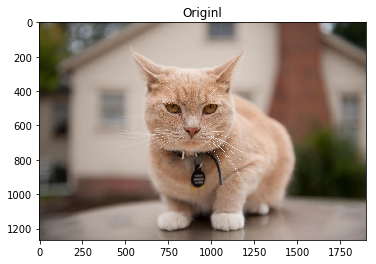

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from Model_save/alexnet
The picture is cat rate: 100.0000 %
The picture is dog rate: 0.0000 % 


In [10]:
model_dir = 'Model_save/alexnet'
picture_path = 'cat.jpg'
img_test = plt.imread(picture_path)
plt.imshow(img_test)
plt.title('Originl')
plt.show()
Predict(model_dir,picture_path)

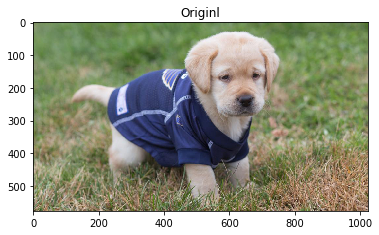

INFO:tensorflow:Restoring parameters from Model_save/alexnet
The picture is cat rate: 0.0000 %
The picture is dog rate: 100.0000 % 


In [11]:
model_dir = 'Model_save/alexnet'
picture_path = 'dog.jpg'
img_test = plt.imread(picture_path)
plt.imshow(img_test)
plt.title('Originl')
plt.show()
Predict(model_dir,picture_path)